In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Reading Data

df = pd.read_csv('laptop_details.csv')
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [3]:
print(df['Feature'][6])

Processor: Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 CoresRAM & Storage: 8GB DDR4 & 1TB + 256GB SSDGraphics & Keyboard: Integrated & Standard KeyboardDisplay: 15.6" FHD WVA AG Narrow BorderPorts: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneIntel Core i3 Processor (11th Gen)8 GB DDR4 RAMWindows 11 Operating System1 TB HDD|256 GB SSD39.62 cm (15.6 inch) Display1 YEAR


#### Extracting Various Columns from Feature Column Using Regex

In [4]:
# Processor Info

regex = r'(?:AMD|Intel|Apple)[\s\w]+(?:Core|Ryzen|Celeron|M1|M2|Pentium|Snapdragon|Athlon)[\s\w]+Processor'

df['Processor'] = df.Feature.apply(lambda x : re.findall(regex, x)[0] if re.findall(regex, x) else None)

In [5]:
# RAM Info

regex = r'(\d+) ?(?:GB|TB)'

df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x)[0])

In [6]:
# SSD

regex = r'[\d]+\s(?:GB|TB)\s(?:SSD)'

df['SSD'] = df['Feature'].apply(lambda x : re.findall(regex, x)[0] if re.findall(regex, x) else 'No SSD')

In [7]:
# OS Info

regex = r'(Windows (?:10|11)|Mac OS|Linux|DOS|Chrome)[\s\w]*Operating System'

df['OS'] = df['Feature'].apply(lambda x : re.findall(regex, x)[0] if re.findall(regex, x) else None)

In [8]:
# Brand Info

regex = r'^\w+'

df['Brand'] = df['Product'].apply(lambda x : re.findall(regex, x)[0] if re.findall(regex, x) else None)

In [9]:
# Ram Type

regex = r'LPDDR3|LPDDR4X|DDR4|DDR5|RAMMac'

df['RamType'] = df['Feature'].apply(lambda x: re.findall(regex, x)[0] if re.findall(regex, x) else None)

In [10]:
# Display Size

regex = r'[0-9.]+\s+(?:cm)'

df['Display'] = df['Feature'].apply(lambda x: re.findall(regex, x)[0] if re.findall(regex, x) else None)

In [11]:
# HDD

regex = r'[\d]+\s(?:GB|TB)\s(?:HDD)'

df['HDD'] = df['Feature'].apply(lambda x : re.findall(regex, x)[0] if re.findall(regex, x) else 'No HDD')

In [12]:
df.MRP = df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [13]:
df = df.drop(columns = ['Rating', 'Product', 'Feature'])

In [14]:
df.head()

,MRP,Processor,RAM,SSD,OS,Brand,RamType,Display,HDD
0,36990.0,Intel Core i3 Processor,8,256 GB SSD,Windows 11,Lenovo,DDR4,35.56 cm,No HDD
1,39990.0,Intel Core i3 Processor,8,512 GB SSD,Windows 11,Lenovo,DDR4,39.62 cm,No HDD
2,32990.0,Intel Core i3 Processor,8,512 GB SSD,Windows 11,ASUS,DDR4,39.62 cm,No HDD
3,49990.0,AMD Ryzen 5 Hexa Core Processor,8,512 GB SSD,Windows 10,HP,DDR4,39.62 cm,No HDD
4,49990.0,Intel Core i5 Processor,8,512 GB SSD,Windows 11,ASUS,DDR4,39.62 cm,No HDD


In [15]:
df.SSD = df.SSD.apply(lambda x : x.replace('1 TB SSD', '1024 GB SSD').replace('2 TB SSD', '2048 GB SSD').replace('No SSD', '0 GB SSD'))
df.SSD = df.SSD.apply(lambda x : x.replace('GB SSD', '')).astype(int)

In [16]:
df.HDD = df.HDD.apply(lambda x : x.replace('1 TB HDD', '1024 GB HDD').replace('No HDD', '0 GB HDD'))
df.HDD = df.HDD.apply(lambda x : x.replace('GB HDD', '')).astype(int)

In [17]:
df.head()

,MRP,Processor,RAM,SSD,OS,Brand,RamType,Display,HDD
0,36990.0,Intel Core i3 Processor,8,256,Windows 11,Lenovo,DDR4,35.56 cm,0
1,39990.0,Intel Core i3 Processor,8,512,Windows 11,Lenovo,DDR4,39.62 cm,0
2,32990.0,Intel Core i3 Processor,8,512,Windows 11,ASUS,DDR4,39.62 cm,0
3,49990.0,AMD Ryzen 5 Hexa Core Processor,8,512,Windows 10,HP,DDR4,39.62 cm,0
4,49990.0,Intel Core i5 Processor,8,512,Windows 11,ASUS,DDR4,39.62 cm,0


In [18]:
df.isnull().sum()

MRP          0
Processor    1
RAM          0
SSD          0
OS           0
Brand        0
RamType      0
Display      0
HDD          0
dtype: int64

In [19]:
df.duplicated().sum()

314

In [20]:
df = df.drop_duplicates()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MRP        406 non-null    float64
 1   Processor  405 non-null    object 
 2   RAM        406 non-null    object 
 3   SSD        406 non-null    int32  
 4   OS         406 non-null    object 
 5   Brand      406 non-null    object 
 6   RamType    406 non-null    object 
 7   Display    406 non-null    object 
 8   HDD        406 non-null    int32  
dtypes: float64(1), int32(2), object(6)
memory usage: 28.5+ KB


In [22]:
df[df.isna().any(axis = 1)]

,MRP,Processor,RAM,SSD,OS,Brand,RamType,Display,HDD
83,32990.0,None,4,0,Windows 11,SAMSUNG,LPDDR4X,35.56 cm,0


In [23]:
df = df.dropna(how = 'any', axis = 0)

In [24]:
df.Processor = df.Processor.apply(lambda x : x.replace('Intel OptaneIntel Core i3 Processor', 'Intel Core i3 Processor'))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MRP        405 non-null    float64
 1   Processor  405 non-null    object 
 2   RAM        405 non-null    object 
 3   SSD        405 non-null    int32  
 4   OS         405 non-null    object 
 5   Brand      405 non-null    object 
 6   RamType    405 non-null    object 
 7   Display    405 non-null    object 
 8   HDD        405 non-null    int32  
dtypes: float64(1), int32(2), object(6)
memory usage: 28.5+ KB


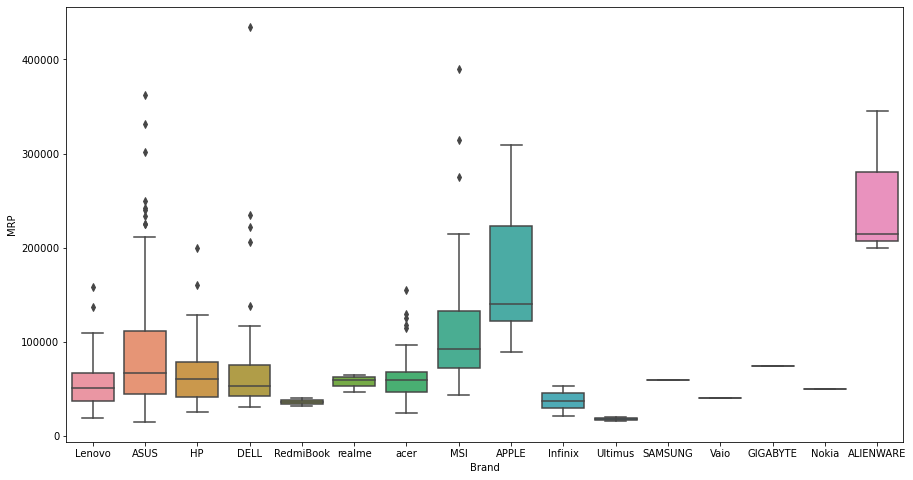

In [26]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df.Brand, y = df.MRP)
plt.show()

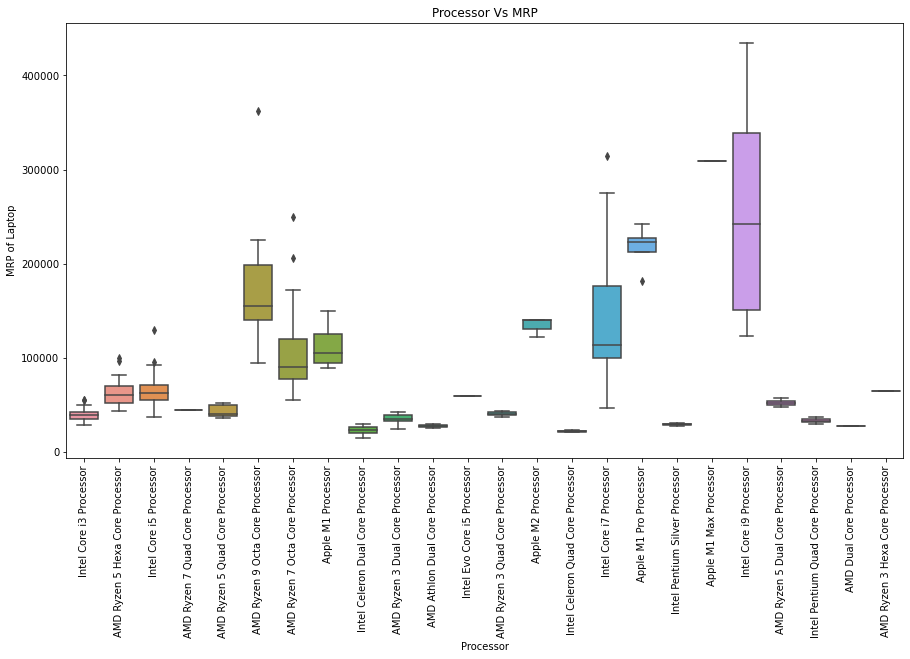

In [27]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df.Processor, y = df.MRP)
plt.xticks(rotation = 'vertical')
plt.xlabel('Processor')
plt.ylabel('MRP of Laptop')
plt.title('Processor Vs MRP')
plt.show()

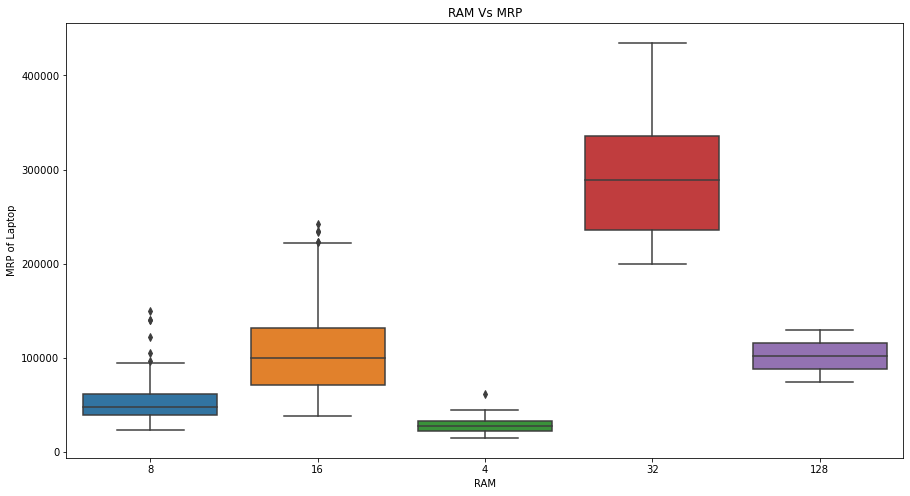

In [28]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df.RAM, y = df.MRP)
plt.xlabel('RAM')
plt.ylabel('MRP of Laptop')
plt.title('RAM Vs MRP')
plt.show()

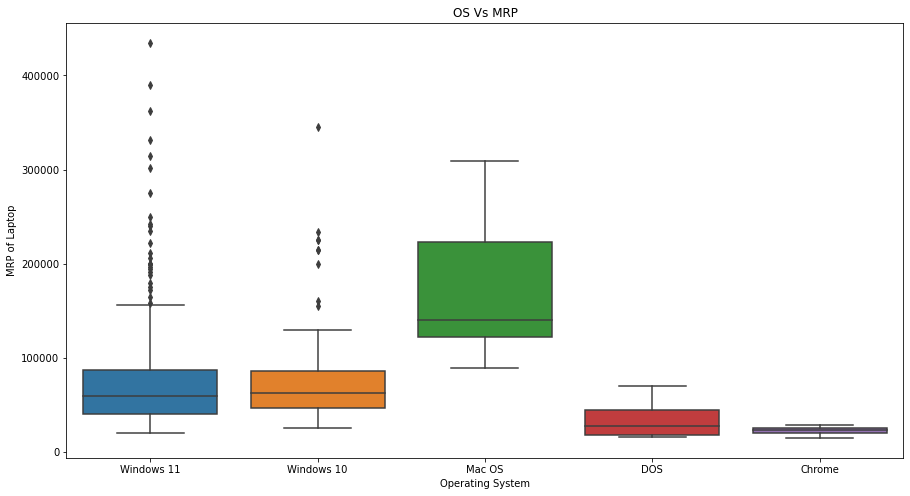

In [29]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df.OS, y = df.MRP)
plt.xlabel('Operating System')
plt.ylabel('MRP of Laptop')
plt.title('OS Vs MRP')
plt.show()

#### There Are Outliers Present in Data But We Do Not Perform Outlier Treatment As There Is Less Data & Maybe Some Laptops Are Actually Sold For Higher Prices Or Lower Prices

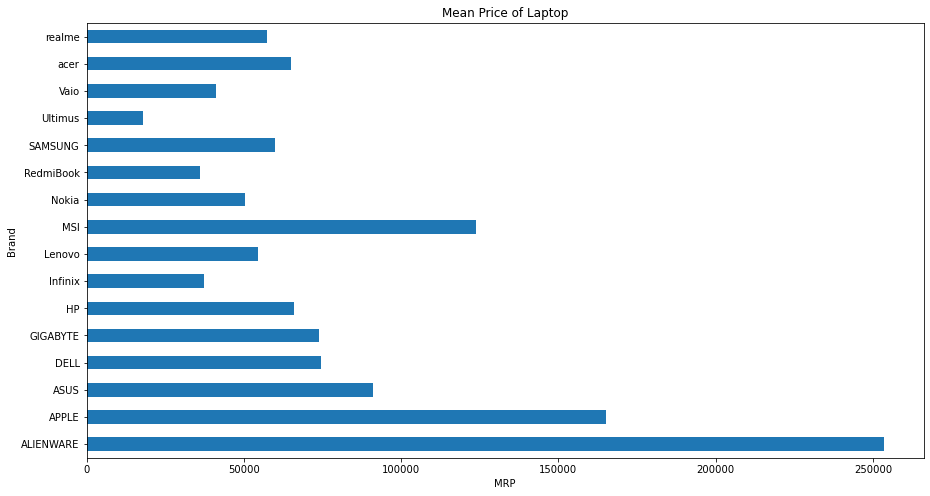

In [30]:
plt.figure(figsize = (15, 8))
df.groupby('Brand')['MRP'].mean().plot(kind = 'barh')
plt.title('Mean Price of Laptop')
plt.xlabel('MRP')
plt.ylabel('Brand')
plt.show()

#### Alienware Has The Highest Average MRP Out of All Its Competitors
#### Ultimus Has The Lowest Average MRP Out of All Its Competitors

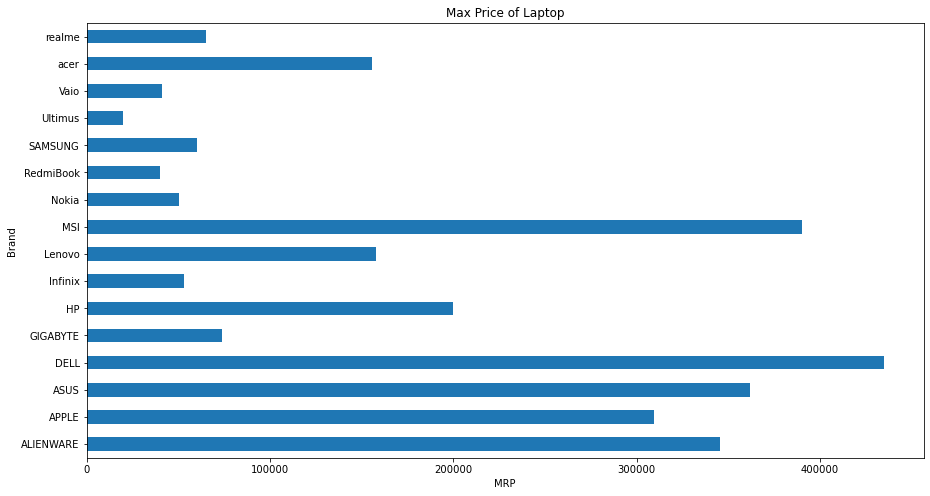

In [31]:
plt.figure(figsize = (15, 8))
df.groupby('Brand')['MRP'].max().plot(kind = 'barh')
plt.title('Max Price of Laptop')
plt.xlabel('MRP')
plt.ylabel('Brand')
plt.show()

#### Dell Has Sold A Laptop At The Highest MRP Which Is Above 4 Lacs Thirty Thousand Rupees
#### Ultimus Has Sold A Laptop At The Lowest MRP Which Is Around Twenty Thousand Rupees

<AxesSubplot:xlabel='Brand', ylabel='count'>

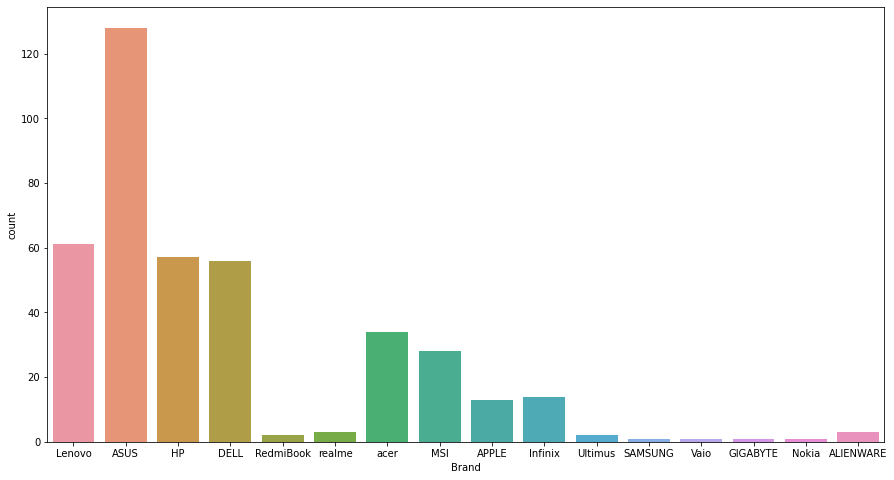

In [32]:
plt.figure(figsize = (15, 8))
sns.countplot(x = df.Brand)

In [33]:
df['Brand'].value_counts()

ASUS         128
Lenovo        61
HP            57
DELL          56
acer          34
MSI           28
Infinix       14
APPLE         13
realme         3
ALIENWARE      3
RedmiBook      2
Ultimus        2
Vaio           1
GIGABYTE       1
SAMSUNG        1
Nokia          1
Name: Brand, dtype: int64

#### Asus Has Sold The Most Units Preceded By Lenovo 
#### Vaio, GIGABYTE, Nokia & Samsung Have Sold Only 1 Unit

In [34]:
# Finding Max, Min & Mean MRP of Various Brands

df.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                         
                min       max           mean
Brand                                       
ALIENWARE  199990.0  345390.0  253390.000000
APPLE       88990.0  309490.0  165028.461538
ASUS        14990.0  361990.0   91117.546875
DELL        30428.0  434830.0   74613.232143
GIGABYTE    73990.0   73990.0   73990.000000
HP          25990.0  199990.0   65943.157895
Infinix     20990.0   52990.0   37347.142857
Lenovo      19490.0  157990.0   54489.147541
MSI         43990.0  389990.0  123712.107143
Nokia       50490.0   50490.0   50490.000000
RedmiBook   31990.0   39990.0   35990.000000
SAMSUNG     59990.0   59990.0   59990.000000
Ultimus     15990.0   19990.0   17990.000000
Vaio        40990.0   40990.0   40990.000000
acer        24990.0  155490.0   65000.764706
realme      46990.0   64999.0   57326.333333

In [35]:
df.sample(5)

,MRP,Processor,RAM,SSD,OS,Brand,RamType,Display,HDD
309,69990.0,Intel Core i5 Processor,8,256,Windows 10,HP,DDR4,39.62 cm,1024
214,67990.0,AMD Ryzen 7 Octa Core Processor,16,512,Windows 11,ASUS,DDR4,39.62 cm,0
34,73990.0,AMD Ryzen 7 Octa Core Processor,8,512,Windows 11,ASUS,DDR4,43.94 cm,0
669,65990.0,Intel Core i5 Processor,8,512,Windows 10,ASUS,DDR4,39.62 cm,0
352,200000.0,Intel Core i7 Processor,16,1024,Windows 11,MSI,DDR5,39.62 cm,0


In [36]:
df['Display'] = df['Display'].apply(lambda x: x.replace('cm', ''))

In [37]:
df['Display']

0      35.56 
1      39.62 
2      39.62 
3      39.62 
4      39.62 
        ...  
713    33.78 
714    39.62 
715    29.46 
718    35.56 
719    39.62 
Name: Display, Length: 405, dtype: object

In [38]:
df.head()

,MRP,Processor,RAM,SSD,OS,Brand,RamType,Display,HDD
0,36990.0,Intel Core i3 Processor,8,256,Windows 11,Lenovo,DDR4,35.56,0
1,39990.0,Intel Core i3 Processor,8,512,Windows 11,Lenovo,DDR4,39.62,0
2,32990.0,Intel Core i3 Processor,8,512,Windows 11,ASUS,DDR4,39.62,0
3,49990.0,AMD Ryzen 5 Hexa Core Processor,8,512,Windows 10,HP,DDR4,39.62,0
4,49990.0,Intel Core i5 Processor,8,512,Windows 11,ASUS,DDR4,39.62,0


In [39]:
df.to_csv('cleaned.csv', index = False)